In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

# 1)Как выбирать размер батча?


In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
k = 0
for data in trainset:
    k += 1
print(k)

6000


In [6]:
X, y = data[0][0], data[1][0]

In [10]:
print(X, y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

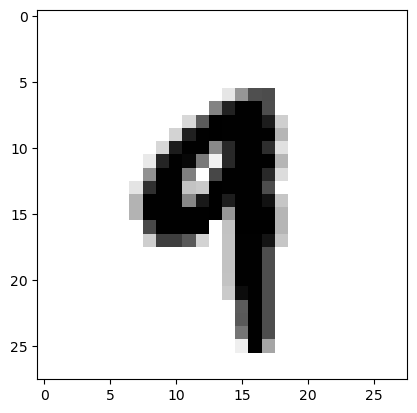

In [12]:
plt.imshow(X.view(28, 28), cmap='gray_r')

In [15]:
data[0][0][0][6]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0980, 0.4118, 0.6902, 0.7020,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [30]:
total = 0
dic_count = {int(i): 0 for i in range(10)}


{0: 94768, 1: 107872, 2: 95328, 3: 98096, 4: 93472, 5: 86736, 6: 94688, 7: 100240, 8: 93616, 9: 95184}
Процентоное соотношение цифры 0 от общего кол-ва цифр: 9.871666666666666%
Процентоное соотношение цифры 1 от общего кол-ва цифр: 11.236666666666666%
Процентоное соотношение цифры 2 от общего кол-ва цифр: 9.93%
Процентоное соотношение цифры 3 от общего кол-ва цифр: 10.218333333333334%
Процентоное соотношение цифры 4 от общего кол-ва цифр: 9.736666666666666%
Процентоное соотношение цифры 5 от общего кол-ва цифр: 9.035%
Процентоное соотношение цифры 6 от общего кол-ва цифр: 9.863333333333333%
Процентоное соотношение цифры 7 от общего кол-ва цифр: 10.441666666666666%
Процентоное соотношение цифры 8 от общего кол-ва цифр: 9.751666666666667%
Процентоное соотношение цифры 9 от общего кол-ва цифр: 9.915%


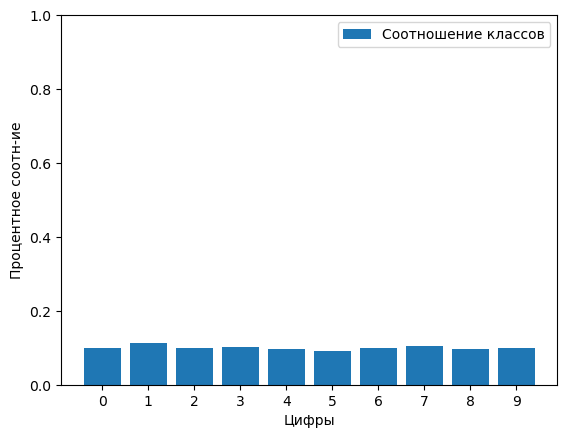

In [46]:
for dat in trainset:
    tens, mark = dat
    for y in mark:
        dic_count[int(y)] += 1
        total += 1
print(dic_count)
for k, v in dic_count.items():
    print(f'Процентоное соотношение цифры {k} от общего кол-ва цифр: {v*100/total}%')
keys = dic_count.keys()
vals = dic_count.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Цифры")
plt.xticks(list(keys))
plt.legend()
plt.show()

Данные достаточно сбалансированы для дальнейшего обучения

In [47]:
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
net = Net()

Net()


In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


НС имеет 784 входа, 2 скрытых слоя по 64 нейрона в каждом и выходной слой с 10 нейронами по нейрону на каждый класс.

In [51]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


На данный момент, я построил НС, которой можно передавать данные и получать результат, функции активации на всех нейронах пока что линейные. Предлагаю прогнать случайный набор пикселей и посмотреть на работуспособность сети.

In [52]:
rndm = torch.rand((28, 28))

In [53]:
rndm = rndm.view(-1, 28*28)

In [54]:
output = net(rndm)
print(output)

tensor([[-0.0998,  0.0043, -0.0681, -0.0689,  0.0137,  0.2502, -0.0332, -0.2105,
          0.0421,  0.0555]], grad_fn=<AddmmBackward0>)


Получилось непонятно что, но получилось- сеть работает.

# лучше обучать встройкой или создавать класс?

In [64]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [65]:
import torch.optim as optim

In [66]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [73]:
for epoch in range(5): # 5 эпох
    for data in trainset:  # data-батч данных из 10 цифр
        X, y = data  # X это батч с цветовой палитрой, y это батч с классами
        net.zero_grad()
        output = net(X.view(-1,784))
        loss = F.nll_loss(output, y)  # вычисляем функцию потерь
        loss.backward()  # передаем это значение назад по сети
        optimizer.step()  # пытаемся оптимизировать значение весов исходя из потерь и градиента
    print(loss)

tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(1.2576e-05, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(2.0073e-05, grad_fn=<NllLossBackward0>)
tensor(9.4776e-05, grad_fn=<NllLossBackward0>)


In [74]:
correct = 0
total = 0

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score

In [80]:
precision, recall, f1, accuracy = [], [], [], []

In [77]:
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f'Accuracy: {round(correct/total, 3) * 100}%')


Accuracy: 97.6%
